In [1]:
import pandas as pd
import numpy as np
import yfinance as yf

In [ ]:
vix_df = yf.download('^VIX')

In [3]:
vix_df['MA'] = vix_df.Close.rolling('30D').mean()

In [ ]:
# We need to check if, in each row, the Close value is at least 1.5 times the MA value

In [5]:
# Creating a new dataframe that meets our criteria
vix_df_filt = vix_df[vix_df.Close > (vix_df.MA)*1.5]
# There is an issue: we have consecutive days where these conditions are met
# We want a distance of at least one month

In [6]:
pd.Series(vix_df_filt.index).diff()
# this returns the difference between the dates in days

0          NaT
1       1 days
2    1336 days
3    1305 days
4    1418 days
        ...   
60      1 days
61    314 days
62    303 days
63      5 days
64     55 days
Name: Date, Length: 65, dtype: timedelta64[ns]

In [7]:
pd.Series(vix_df_filt.index).diff() / np.timedelta64(1,'D')
# getting the values as a float type

0        NaN
1        1.0
2     1336.0
3     1305.0
4     1418.0
       ...  
60       1.0
61     314.0
62     303.0
63       5.0
64      55.0
Name: Date, Length: 65, dtype: float64

In [8]:
pd.Series(vix_df_filt.index).diff() / np.timedelta64(1,'D') >= 30
# as booleans

0     False
1     False
2      True
3      True
4      True
      ...  
60    False
61     True
62     True
63    False
64     True
Name: Date, Length: 65, dtype: bool

In [10]:
series = pd.Series(vix_df_filt.index).diff() / np.timedelta64(1,'D') >= 30
series[0] = True
# we need the first value to be true

In [12]:
signals = vix_df_filt[series.values]
# getting our buy signals

In [ ]:
# S&P500
sp_df = yf.download('^GSPC', start = '1990-01-01')

In [16]:
test = sp_df[sp_df.index >= signals.index[0]]

In [17]:
from pandas.tseries.offsets import DateOffset
# allows us to add days, months, years to a particular date

In [27]:
returns = []

for i in range(len(signals)):
    x_ = sp_df[(sp_df.index >= signals.index[i]) &
             (sp_df.index <= signals.index[i] + DateOffset(months=6))]
    returns.append((x_.Close.pct_change() + 1).prod() -1)

In [28]:
pd.Series(returns).mean()
# 6%

0.06143312990280283

<Axes: >

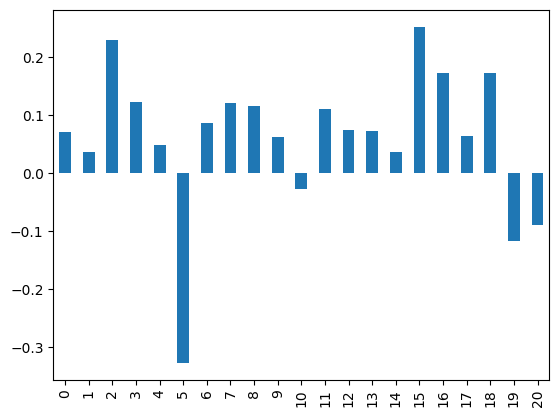

In [29]:
pd.Series(returns).plot(kind='bar')